In [96]:
# import libraries
import pandas as pd
import numpy as np

In [133]:
# loading data set as Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%205/data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [134]:
boolean -  1 or 0, true or false 

fuel-type -- string -- [gas, fuel, electronic]   <- categorical 

NameError: name 'boolean' is not defined

In [135]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Data Cleaning

In [136]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

price
True     201
False      4
Name: count, dtype: int64

In [137]:
# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [138]:
price = df['price'].loc[df['price'] != '?']

In [139]:
price

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 201, dtype: object

In [140]:
price.astype('int').mean()

13207.129353233831

In [141]:
#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [142]:
## another way to fix the value
pandas.fillna()

NameError: name 'pandas' is not defined

In [143]:
df[df['price'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [144]:
df.loc[df['price'] == '?','price'] = np.nan

In [145]:
df[df['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [146]:
df['price'] = df['price'].fillna(mean)

In [147]:
sum(df['price'].isna())

0

In [148]:
# Cleaning the horsepower losses field
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [149]:
# Cleaning the Normalized losses field
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(str).astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int64

In [150]:
# cleaning the bore
# Find out the number of invalid value
df['bore'].loc[df['bore'] == '?']
# Replace the non-numeric value to null and convert the datatype
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df.bore.head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [151]:
# Cleaning the column stoke
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df['stroke'].head()

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [152]:
# Cleaning the column peak-rpm 
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['peak-rpm'].head()

0    5000.0
1    5000.0
2    5000.0
3    5500.0
4    5500.0
Name: peak-rpm, dtype: float64

In [153]:
# Cleaning the Column num-of-doors data
# remove the records which are having the value '?'
df['num-of-doors'].loc[df['num-of-doors'] == '?']
df= df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [154]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000,203.000000
mean,0.837438,130.147783,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.463054,5125.870647,25.172414,30.699507,13241.911330
std,1.250021,35.956490,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.274054,0.318023,3.888216,39.612384,479.820136,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,128.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,164.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Let's start by computing Measure of central tendency

In [155]:
# get column height from df
height = df["height"]
print(height)

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: height, Length: 203, dtype: float64


In [156]:
#calculate mean, median and mode of dat set height
mean = height.mean()
median =height.median()
mode = height.mode()
print(mean , median, mode)

53.73152709359606 54.1 0    50.8
Name: height, dtype: float64


For categorical variables which has discrite values we can summarize the categorical data is by using the function value_counts(). 

In [157]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            16
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
mercedes-benz     8
dodge             8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

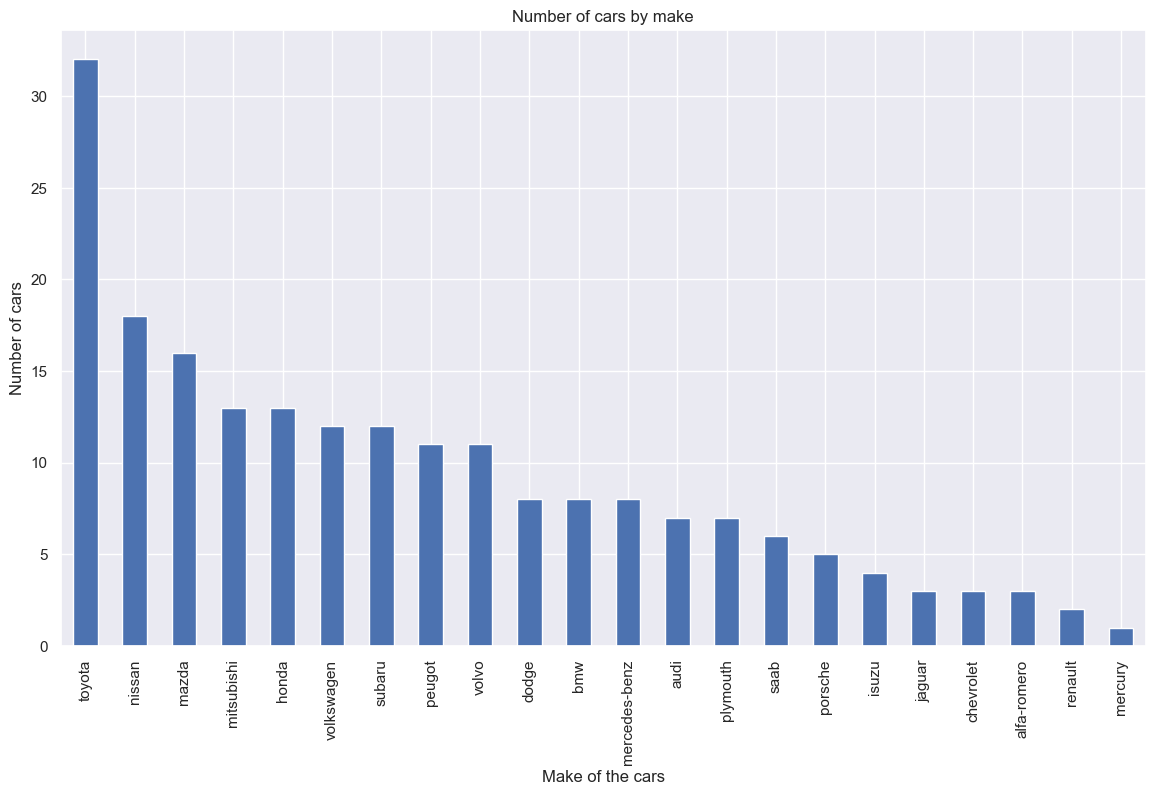

In [158]:
import matplotlib.pyplot as plt

df.make.value_counts().nlargest(30).plot(kind='bar', figsize=(14,8))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make of the cars');

In [159]:
#summarize categories of drive-wheels
drive_wheels_count =df["drive-wheels"].value_counts()
print(drive_wheels_count)

drive-wheels
fwd    118
rwd     76
4wd      9
Name: count, dtype: int64


In [160]:
df['drive-wheels']

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drive-wheels, Length: 203, dtype: object

In [161]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [162]:
numerics = ['int64', 'float64']

df_numeric = df.select_dtypes(include=numerics)

**Measures of Dispersion**

In [163]:
#standard variance of data set using std() function
std_dev = df_numeric.std()
print(std_dev)

# standard variance of the specific column
sv_height=df_numeric.loc[:,"height"].std()
print(sv_height)

symboling               1.250021
normalized-losses      35.956490
wheel-base              6.040994
length                 12.339090
width                   2.150274
height                  2.442526
curb-weight           522.557049
engine-size            41.797123
bore                    0.274054
stroke                  0.318023
compression-ratio       3.888216
horsepower             39.612384
peak-rpm              479.820136
city-mpg                6.529812
highway-mpg             6.874645
price                7898.957924
dtype: float64
2.442525704031867


# Measure of variance

In [164]:
# variance of data set using var() function
variance=df_numeric.var()
print(variance)
# variance of the specific column
var_height=df_numeric.loc[:,"height"].var()
print(var_height)

symboling            1.562552e+00
normalized-losses    1.292869e+03
wheel-base           3.649361e+01
length               1.522531e+02
width                4.623677e+00
height               5.965932e+00
curb-weight          2.730659e+05
engine-size          1.746999e+03
bore                 7.510565e-02
stroke               1.011384e-01
compression-ratio    1.511822e+01
horsepower           1.569141e+03
peak-rpm             2.302274e+05
city-mpg             4.263844e+01
highway-mpg          4.726074e+01
price                6.239354e+07
dtype: float64
5.965931814856368


<Axes: >

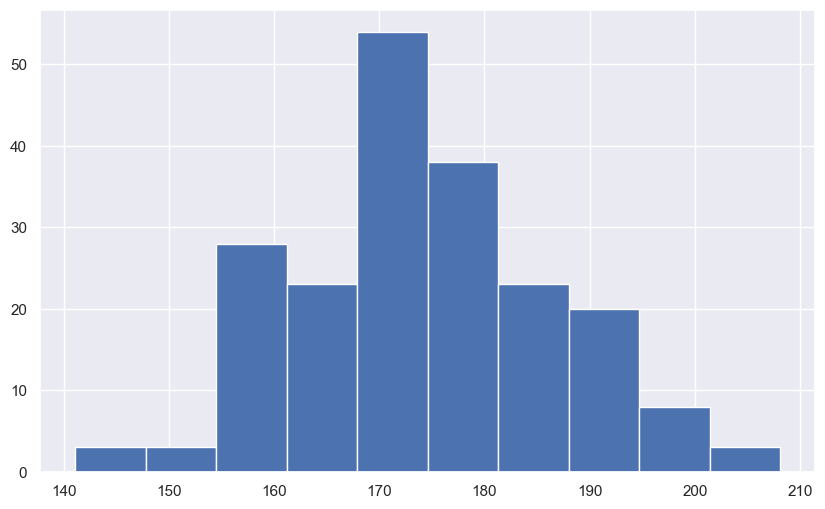

In [165]:
df_numeric['length'].hist()

<Axes: >

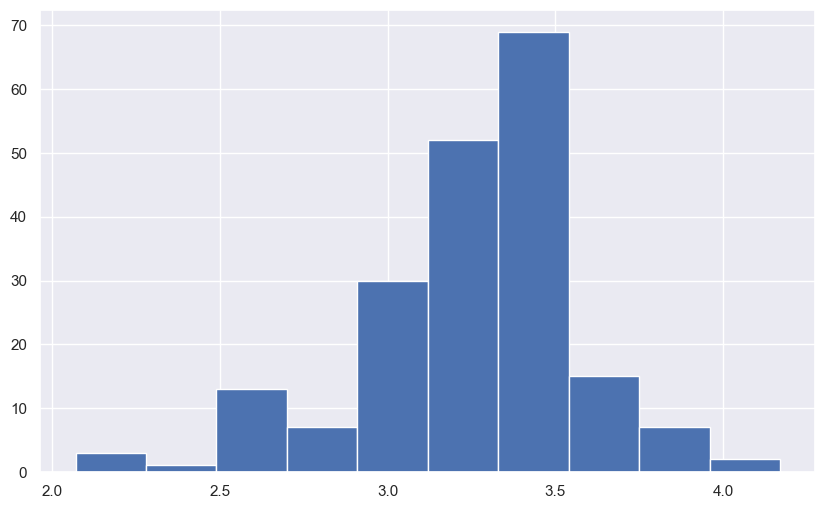

In [166]:
df_numeric['stroke'].hist()

### Skewness

In [167]:
df_numeric.skew()

symboling            0.204275
normalized-losses    0.209007
wheel-base           1.041170
length               0.154086
width                0.900685
height               0.064134
curb-weight          0.668942
engine-size          1.934993
bore                 0.013419
stroke              -0.669515
compression-ratio    2.682640
horsepower           1.391224
peak-rpm             0.073094
city-mpg             0.673533
highway-mpg          0.549104
price                1.812335
dtype: float64

<Axes: >

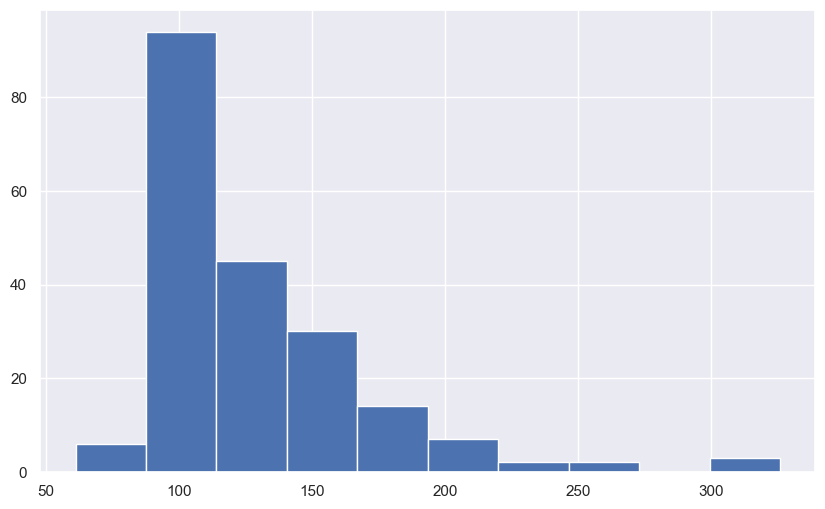

In [168]:
df_numeric['engine-size'].hist()

In [169]:
# skewness of the specific column
df_numeric.loc[:,"height"].skew()

0.06413448813322854

# Kurtosis


<Axes: >

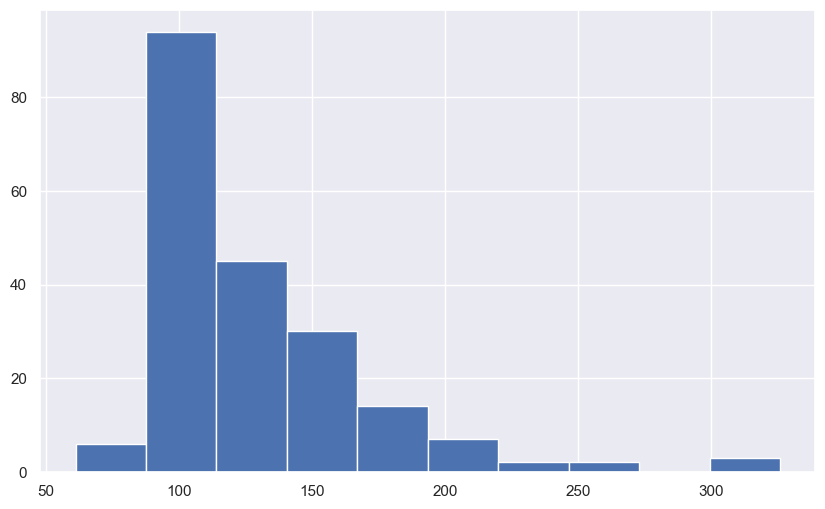

In [170]:
df_numeric['engine-size'].hist()

<Axes: >

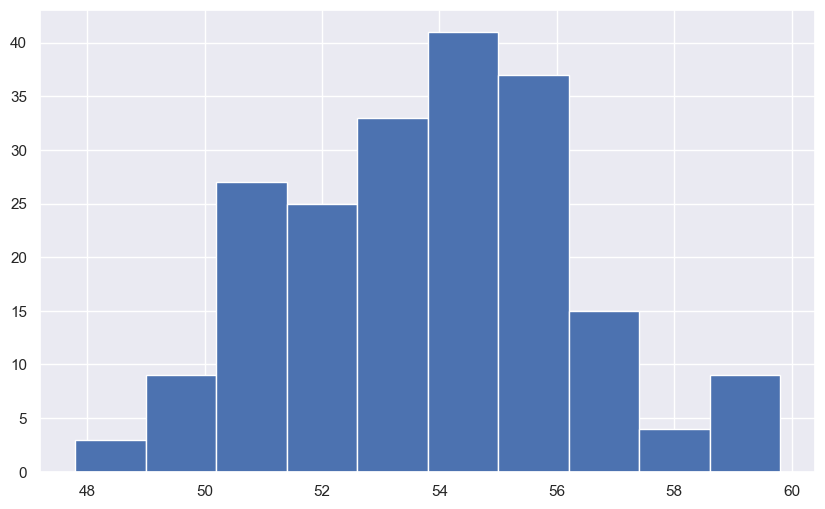

In [171]:
df_numeric['height'].hist()

In [172]:
# Kurtosis of data in data using kurt() function
kurtosis =df_numeric.kurt()
print(kurtosis)

# Kurtosis of the specific column
sk_height=df_numeric.loc[:,"height"].kurt()
print(sk_height)

symboling           -0.691709
normalized-losses   -0.471235
wheel-base           0.986065
length              -0.075680
width                0.687375
height              -0.429298
curb-weight         -0.069648
engine-size          5.233661
bore                -0.830965
stroke               2.030592
compression-ratio    5.643878
horsepower           2.646625
peak-rpm             0.068155
city-mpg             0.624470
highway-mpg          0.479323
price                3.287412
dtype: float64
-0.4292976016374439


In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (10, 6)

Text(0, 0.5, 'price')

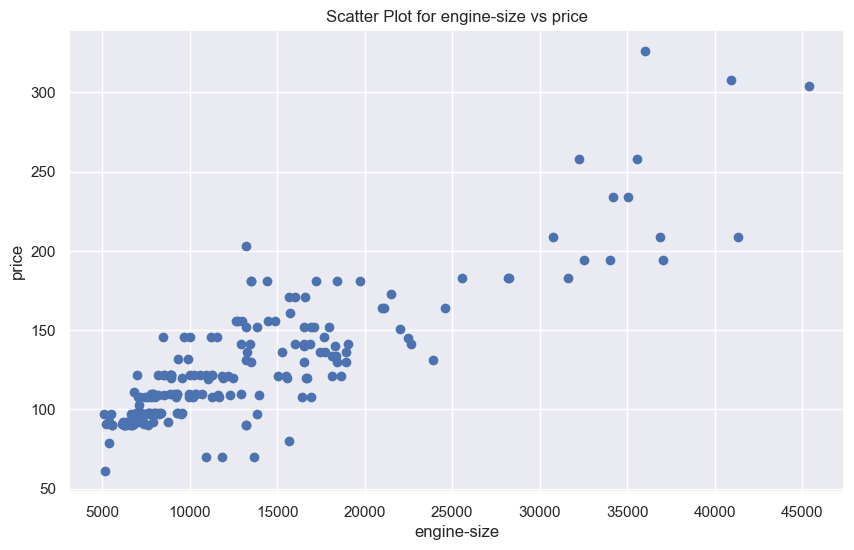

In [174]:
# plot the relationship between “engine-size” and ”price”
plt.scatter(df_numeric["price"], df_numeric["engine-size"])
plt.title("Scatter Plot for engine-size vs price")
plt.xlabel("engine-size")
plt.ylabel("price")

<Axes: ylabel='price'>

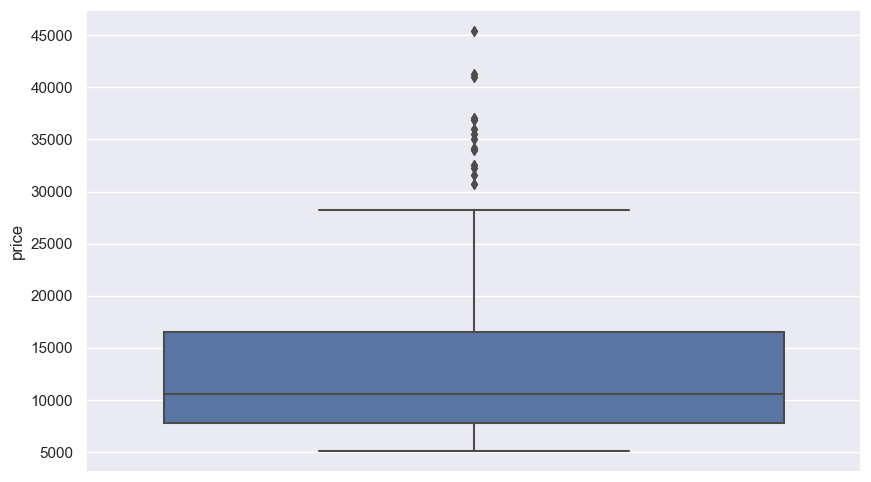

In [176]:
sns.boxplot(y="price",data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

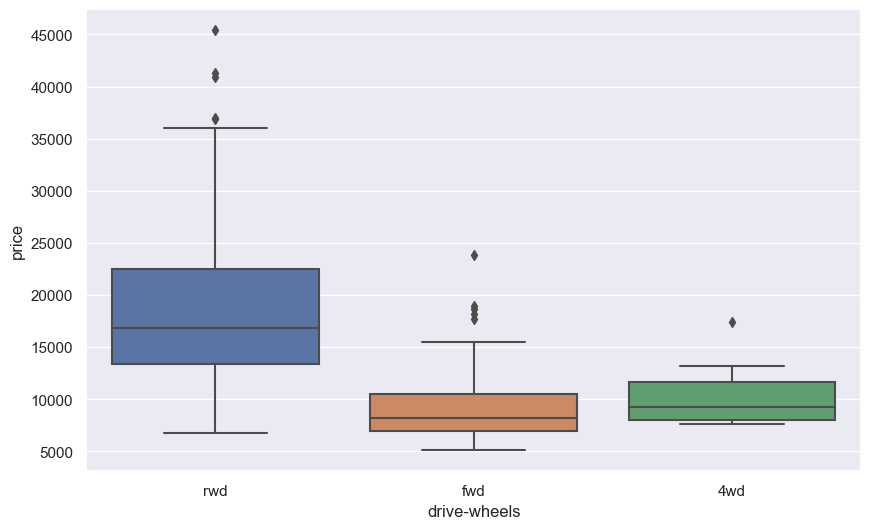

In [175]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)

In [80]:
type(df.price[0])

numpy.int64

# Calculating percentiles



In [81]:
# calculating 30th percentile of heights in dataset
height = df["height"]
percentile = np.percentile(height, 50,)
print(percentile)

54.1


**Quartiles** 

It divides the data set into four equal points. 

First quartile = 25th percentile
Second quartile = 50th percentile (Median)
Third quartile = 75th percentile

Based on the quartile, there is a another measure called inter-quartile range that also measures the variability in the dataset. It is defined as:

IQR = Q3 - Q1

IQR is not affected by the presence of outliers. 




In [82]:
price = df.price.sort_values()
Q1 = np.percentile(price, 25)
Q2 = np.percentile(price, 50)
Q3 = np.percentile(price, 75)

IQR = Q3 - Q1
IQR

8718.5

(array([0.00492611, 0.00492611, 0.00492611, 0.00492611, 0.01477833,
        0.01477833, 0.02463054, 0.0591133 , 0.0591133 , 0.0591133 ,
        0.08866995, 0.1182266 , 0.18719212, 0.19211823, 0.19211823,
        0.2364532 , 0.2364532 , 0.2955665 , 0.2955665 , 0.31527094,
        0.37931034, 0.408867  , 0.43842365, 0.45320197, 0.47783251,
        0.48768473, 0.53694581, 0.63546798, 0.6453202 , 0.67980296,
        0.70935961, 0.71428571, 0.81773399, 0.8226601 , 0.86206897,
        0.88669951, 0.89655172, 0.93596059, 0.93596059, 0.93596059,
        0.95073892, 0.95073892, 0.95073892, 0.95566502, 0.95566502,
        0.97536946, 0.97536946, 0.99014778, 0.99014778, 1.        ]),
 array([47.8 , 48.04, 48.28, 48.52, 48.76, 49.  , 49.24, 49.48, 49.72,
        49.96, 50.2 , 50.44, 50.68, 50.92, 51.16, 51.4 , 51.64, 51.88,
        52.12, 52.36, 52.6 , 52.84, 53.08, 53.32, 53.56, 53.8 , 54.04,
        54.28, 54.52, 54.76, 55.  , 55.24, 55.48, 55.72, 55.96, 56.2 ,
        56.44, 56.68, 56.92, 57.16

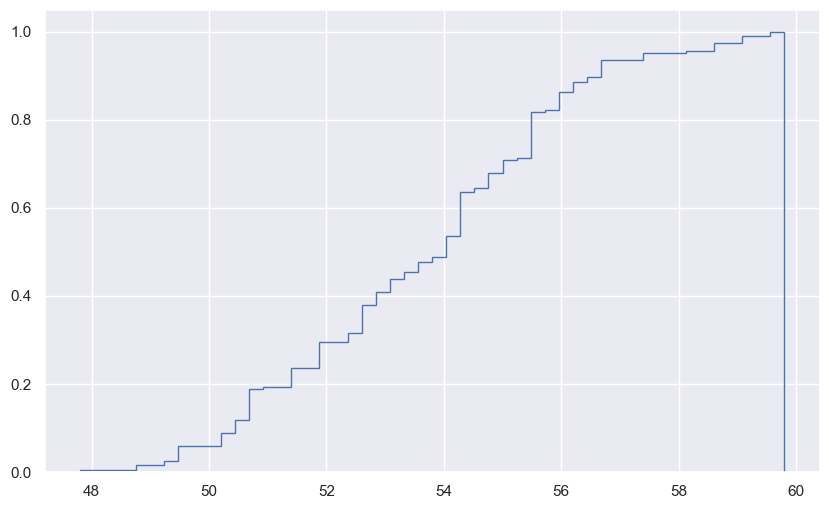

In [91]:
## cumulative function
plt.hist(height, bins =50, density=True, histtype='step',
                           cumulative=True, label='Empirical')

In [83]:
df["normalized-losses"].describe()

count    203.000000
mean     130.147783
std       35.956490
min       65.000000
25%      101.000000
50%      128.000000
75%      164.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [84]:

scorePhysics = [34,35,35,35,35,35,36,36,37,37,37,37,37,38,38,38,39,39,
              40,40,40,40,40,41,42,42,42,42,42,42,42,42,43,43,43,43,44,44,44,44,44,44,45,
              45,45,45,45,46,46,46,46,46,46,47,47,47,47,47,47,48,48,48,48,48,49,49,49,49,
              49,49,49,49,52,52,52,53,53,53,53,53,53,53,53,54,54,
              54,54,54,54,54,55,55,55,55,55,56,56,56,56,56,56,57,57,57,58,58,59,59,59,59,
              59,59,59,60,60,60,60,60,60,60,61,61,61,61,61,62,62,63,63,63,63,63,64,64,64,
              64,64,64,64,65,65,65,66,66,67,67,68,68,68,68,68,68,68,69,70,71,71,71,72,72,
              72,72,73,73,74,75,76,76,76,76,77,77,78,79,79,80,80,81,84,84,85,85,87,87,88]
            
scoreLiterature = [49,49,50,51,51,52,52,52,52,53,54,54,55,55,55,55,56,
                 56,56,56,56,57,57,57,58,58,58,59,59,59,60,60,60,60,60,60,60,61,61,61,62,
                 62,62,62,63,63,67,67,68,68,68,68,68,68,69,69,69,69,69,69,
                 70,71,71,71,71,72,72,72,72,73,73,73,73,74,74,74,74,74,75,75,75,76,76,76,
                 77,77,78,78,78,79,79,79,80,80,82,83,85,88]
                 
scoreComputer = [56,57,58,58,58,60,60,61,61,61,61,61,61,62,62,62,62,
                63,63,63,63,63,64,64,64,64,65,65,66,66,67,67,67,67,67,67,67,68,68,68,69,
                69,70,70,70,71,71,71,73,73,74,75,75,76,76,77,77,77,78,78,81,82,
                84,89,90]

scores=[scorePhysics, scoreLiterature, scoreComputer]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb98ac0b820>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb98ac0bb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb98ac0b640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb979c732b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb979c737c0>],
 'means': [<matplotlib.lines.Line2D at 0x7fb979c73520>]}

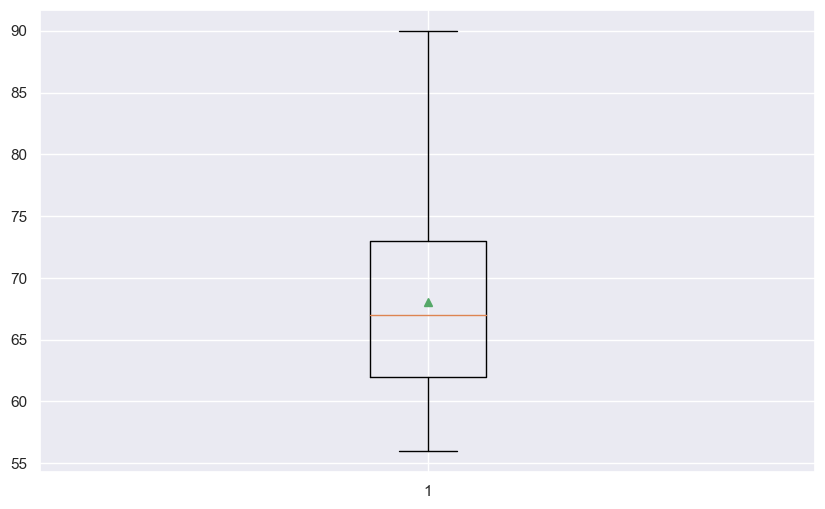

In [85]:
 plt.boxplot(scoreComputer, showmeans=True, whis = 99)
    

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fb958635df0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fb958630e50>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fb958650400>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fb958650760>}

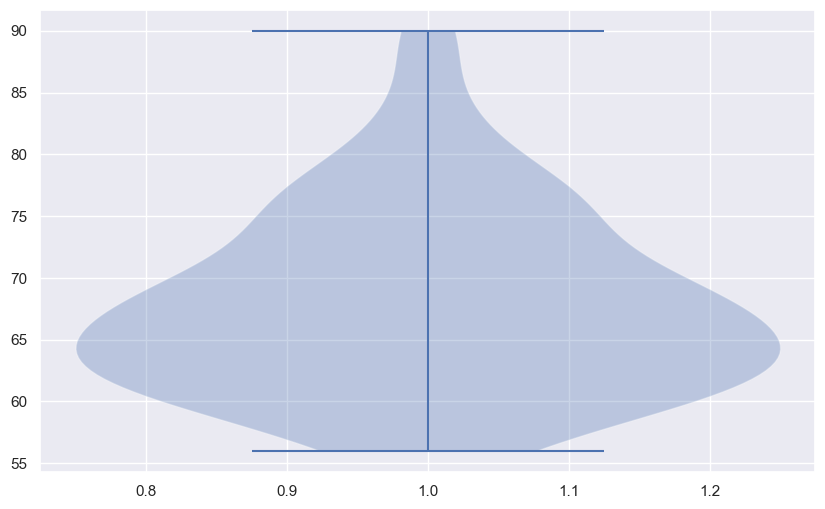

In [89]:
plt.violinplot(scoreComputer)

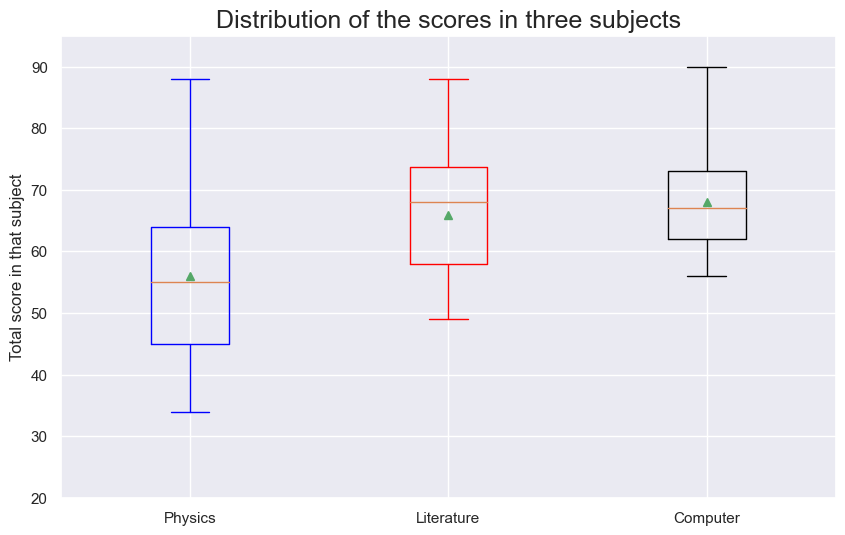

In [86]:
box = plt.boxplot(scores, showmeans=True, whis=99)

plt.setp(box['boxes'][0], color='blue')
plt.setp(box['caps'][0], color='blue')
plt.setp(box['caps'][1], color='blue')
plt.setp(box['whiskers'][0], color='blue')
plt.setp(box['whiskers'][1], color='blue')

plt.setp(box['boxes'][1], color='red')
plt.setp(box['caps'][2], color='red')
plt.setp(box['caps'][3], color='red')
plt.setp(box['whiskers'][2], color='red')
plt.setp(box['whiskers'][3], color='red')

plt.ylim([20, 95]) 
plt.grid(True, axis='y')  
plt.title('Distribution of the scores in three subjects', fontsize=18) 
plt.ylabel('Total score in that subject')            
plt.xticks([1,2,3], ['Physics','Literature','Computer'])


plt.show()

### Marginal Distribution vs conditional distribution

In [180]:
df_numeric['length']
pd.cut(df_numeric['length'], bins = [141, 150, 180, 182, 200])

0      (150, 180]
1      (150, 180]
2      (150, 180]
3      (150, 180]
4      (150, 180]
          ...    
200    (182, 200]
201    (182, 200]
202    (182, 200]
203    (182, 200]
204    (182, 200]
Name: length, Length: 203, dtype: category
Categories (4, interval[int64, right]): [(141, 150] < (150, 180] < (180, 182] < (182, 200]]

In [181]:
df_numeric.shape

(203, 16)

<Axes: >

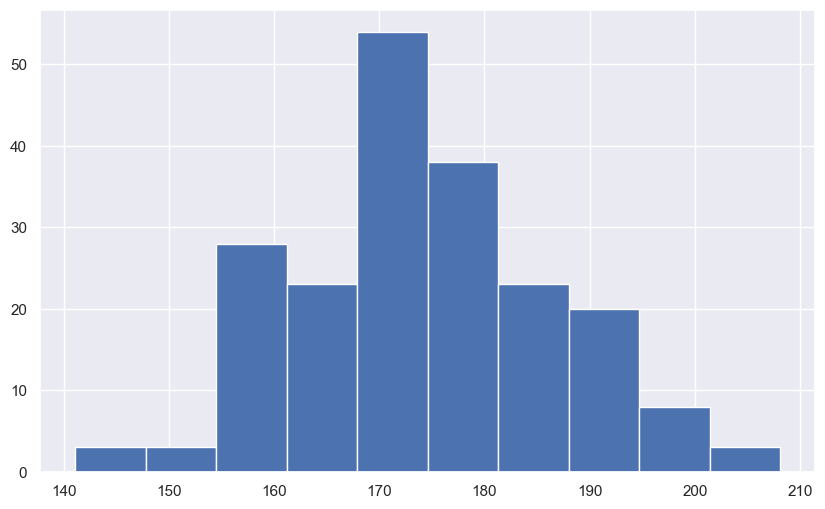

In [92]:
df_numeric['length'].hist()

<Axes: >

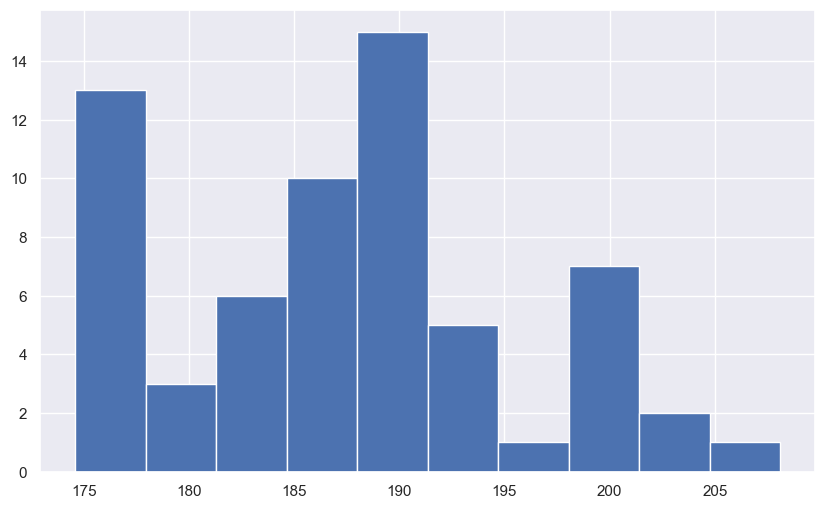

In [95]:
#conditional 
df_numeric[df_numeric['wheel-base'] > 100]['length'].hist()

In [182]:
df_numeric.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.446613,-0.532929,-0.357856,-0.232241,-0.541323,-0.228520,-0.105985,-0.133130,-0.007956,-0.172343,0.068312,0.272162,-0.030513,0.040374,-0.083020
normalized-losses,0.446613,1.000000,0.044916,0.158185,0.212157,-0.349461,0.265983,0.303717,0.082768,0.099114,-0.113747,0.378103,0.190214,-0.354567,-0.317451,0.330624
wheel-base,-0.532929,0.044916,1.000000,0.874651,0.794488,0.588281,0.775870,0.568141,0.488138,0.163744,0.254105,0.353285,-0.359843,-0.475257,-0.549141,0.582379
length,-0.357856,0.158185,0.874651,1.000000,0.840300,0.486316,0.878719,0.682984,0.604518,0.132778,0.154219,0.559618,-0.283068,-0.682433,-0.715913,0.683494
width,-0.232241,0.212157,0.794488,0.840300,1.000000,0.274216,0.867307,0.735016,0.556721,0.185110,0.178893,0.646575,-0.216229,-0.651892,-0.686216,0.728917
height,-0.541323,-0.349461,0.588281,0.486316,0.274216,1.000000,0.293892,0.063622,0.169575,-0.056016,0.253871,-0.107707,-0.316713,-0.056337,-0.115209,0.132614
curb-weight,-0.228520,0.265983,0.775870,0.878719,0.867307,0.293892,1.000000,0.850236,0.648345,0.171289,0.156838,0.752603,-0.266077,-0.762457,-0.802444,0.820439
engine-size,-0.105985,0.303717,0.568141,0.682984,0.735016,0.063622,0.850236,1.000000,0.592931,0.209022,0.029468,0.812981,-0.243784,-0.658584,-0.682212,0.861545
bore,-0.133130,0.082768,0.488138,0.604518,0.556721,0.169575,0.648345,0.592931,1.000000,-0.054250,-0.001731,0.580690,-0.260465,-0.603529,-0.602912,0.531935
stroke,-0.007956,0.099114,0.163744,0.132778,0.185110,-0.056016,0.171289,0.209022,-0.054250,1.000000,0.185802,0.090862,-0.071544,-0.046312,-0.048075,0.084217
